In [1]:
%matplotlib inline
from pyqubo import Spin, Vector, Param, solve_ising, Const
import matplotlib.pyplot as plt
import networkx as nx

## グラフ分割問題

偶数の個数の頂点を持つグラフを２つに分割する。分割されるエッジが最小となる分割方法を見つけたい。
この問題はIsingモデルにより次のように定式化される。

$$H(s) = H_{A}(s) + H_{B}(s)\\
H_{A}(s) = A \left( \sum_{i \in V} s_{i}\right )^2\\
H_{B}(s) = B \sum_{(i, j) \in E} \frac{1-s_{i}s_{j}}{2}
$$

$H_{A}(s)$は２つの集合の頂点数が同じになる制約。$H_{B}(s)$は切断されるエッジの個数である。

In [2]:
def plot_graph(E, colors=None):
    G = nx.Graph()
    for (i, j) in E:
        G.add_edge(i, j)
    plt.figure(figsize=(4,4))
    pos = nx.spring_layout(G)
    nx.draw_networkx(G, pos, node_color=colors)
    plt.axis("off")
    plt.show()

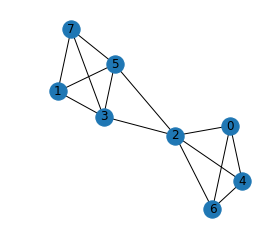

In [3]:
# エッジが以下のように与えられる
E = {(0, 6), (2, 4), (7, 5), (0, 4), (2, 0),
     (5, 3), (2, 3), (2, 6), (4, 6), (1, 3),
     (1, 5), (7, 1), (7, 3), (2, 5)}
plot_graph(E)

ノード数と同じである$8$次元のスピンのスピンベクトル$s$を用意する。各スピンは対応するノードがどちらの集合に属するかを表している。

In [4]:
# スピンベクトルの宣言
s = Vector("s", 8, spin=True)

# パラメータA, Bの宣言
A, B = Param("A"), Param("B")

In [5]:
# ハミルトニアン H_{A}を定義
HA = A * Const(sum(s) ** 2, "num_nodes")

# ハミルトニアン H_{B}を定義
HB = B * sum((1.0 - s[i]*s[j]) / 2.0 for (i, j) in E)

H = HA + HB

In [6]:
# モデルのコンパイル
model = H.compile()

# A=1.0, B=1.0としてIsingモデルを得る
linear, quad, offset = model.to_ising(params={'A': 0.1, 'B':1.0})

In [8]:
# Isingモデルを解く
solution = solve_ising(linear, quad)

# 解をデコードする
decoded_sol, broken = model.decode_solution(solution, var_type="binary")
print("#broken constraints: {}".format(len(broken)))

#broken constraints: 1


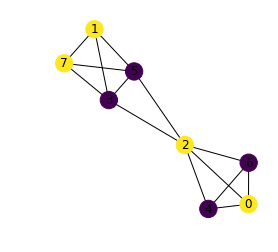

In [9]:
# グラフを色分けしてみる
plot_graph(E, [solution[k] for k in sorted(solution.keys())])